# 시계열 데이터

시간에 특화된 groupby 기능이 필요
- 데이터 중 주말 통계만 필요함

Time lag 또는 Moving Average는 계산
- Time lag : 시간 간격 간의 차이

## Datetime index
- python의 datetime 모듈
- 파이썬은 날짜 데이터 처리를 위해 datetime 모듈을 활용
  - datetime.strptime(변수명, datetime 포맷)
- 대부분의 데이터는 str으로 되어있어서 호출 후 DateTime index로 변환이 필요
  - pd.to_datetime

In [1]:
from datetime import datetime
date_str = '09-19-2018'

date_object = datetime.strptime(date_str, '%m-%d-%Y').date()
print(type(date_object))
print(date_object)

<class 'datetime.date'>
2018-09-19


In [2]:
date_object.day # 날짜

19

In [3]:
date_object.month # 달

9

In [4]:
date_object.weekday() # 요일

2

In [5]:
from datetime import datetime
date_str_1 = '180919'
date_str_2 = '180925'

date_object_1 = datetime.strptime(date_str_1, '%y%m%d').date()
date_object_2 = datetime.strptime(date_str_2, '%y%m%d').date()

date_object_2 - date_object_1 # 각 날짜별로 얼마나 차이나는지 확인 가능

datetime.timedelta(days=6)

In [6]:
from datetime import datetime
datetime_str = '09/19/18 13:55:26'

date_object = datetime.strptime(datetime_str, '%m/%d/%y %H:%M:%S')

print(date_object) # 시간 또한 datetime으로 변환 가능

2018-09-19 13:55:26


## time resampling
- 시간 기준으로 데이터 aggregation
- groupby와 유사
  - 간단하고 다양한 기능 제공
  - .resample

In [7]:
import pandas as pd

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
df = pd.read_csv("/content/drive/MyDrive/ML/Time Series/data/train.csv", parse_dates = ['datetime']) # parse_dates를 사용해서 불러올 때 datetime으로 지정 가능
df.set_index("datetime", inplace = True)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


월별 자전거 수요량

In [10]:
df['month'] = df.index.month
df['year'] = df.index.year

df.groupby(['year', 'month'])['count'].sum() # .reset_index시 데이터프레임 타입으로도 핸들링 가능

year  month
2011  1         23552
      2         32844
      3         38735
      4         50517
      5         79713
      6         89776
      7         92848
      8         83296
      9         79104
      10        79522
      11        70889
      12        61183
2012  1         56332
      2         66269
      3         94766
      4        116885
      5        120434
      6        130957
      7        121769
      8        130220
      9        133425
      10       127912
      11       105551
      12        98977
Name: count, dtype: int64

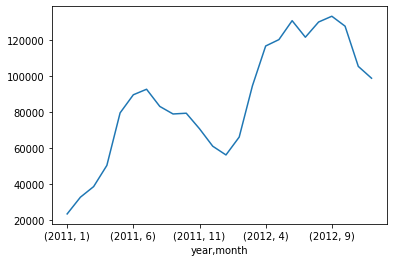

In [11]:
df.groupby(['year', 'month'])['count'].sum().plot() # 그래프로도 볼 수 있음

In [12]:
df["count"].resample('Q').sum() # 분기별로 합 확인

datetime
2011-03-31     95131
2011-06-30    220006
2011-09-30    255248
2011-12-31    211594
2012-03-31    217367
2012-06-30    368276
2012-09-30    385414
2012-12-31    332440
Freq: Q-DEC, Name: count, dtype: int64

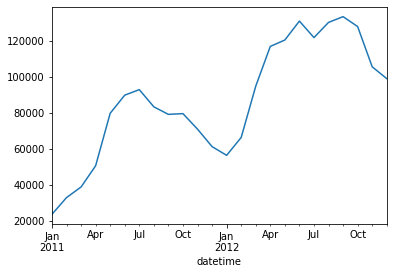

In [13]:
df["count"].resample('M').sum().plot() # 동일한 결과값 확인 가능

In [14]:
df["count"].resample('30T').sum() # 30분마다의 간격

datetime
2011-01-01 00:00:00     16
2011-01-01 00:30:00      0
2011-01-01 01:00:00     40
2011-01-01 01:30:00      0
2011-01-01 02:00:00     32
                      ... 
2012-12-19 21:00:00    168
2012-12-19 21:30:00      0
2012-12-19 22:00:00    129
2012-12-19 22:30:00      0
2012-12-19 23:00:00     88
Freq: 30T, Name: count, Length: 34511, dtype: int64

### resampling - Filter
- something_range 함수로 기간 생성

In [15]:
period = pd.date_range(start = '2011-01-01', end='2011-05-31', freq='M') # 해당 기간동안 M를 기준으로 가져옴
df['count'].resample('M').sum()[period]

datetime
2011-01-31    23552
2011-02-28    32844
2011-03-31    38735
2011-04-30    50517
2011-05-31    79713
Freq: M, Name: count, dtype: int64

In [16]:
pd.date_range(start = '2011-01-01', periods = 8) # 해당 날짜부터 8일동안 가져옴

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08'],
              dtype='datetime64[ns]', freq='D')

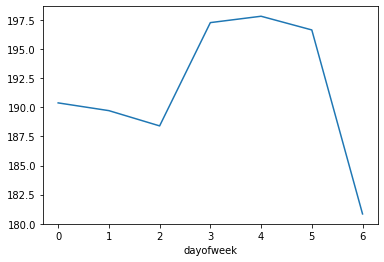

In [17]:
df['dayofweek'] = df.index.dayofweek
df.groupby('dayofweek')['count'].mean().plot()

## Time shifiting
- 시간의 차 (time lag) 분석 필요
- pandas내 time shifting 기능으로 time window를 기준으로 기간간 차이 분석
- .shift

In [19]:
monthly_avg = df['count'].resample('M').mean()
monthly_avg.shift(periods=2, fill_value=0) # 2달씩 미뤄서 0으로 채운다

datetime
2011-01-31      0.000000
2011-02-28      0.000000
2011-03-31     54.645012
2011-04-30     73.641256
2011-05-31     86.849776
2011-06-30    111.026374
2011-07-31    174.809211
2011-08-31    196.877193
2011-09-30    203.614035
2011-10-31    182.666667
2011-11-30    174.622517
2011-12-31    174.773626
2012-01-31    155.458333
2012-02-29    134.173246
2012-03-31    124.353201
2012-04-30    145.646154
2012-05-31    208.276923
2012-06-30    257.455947
2012-07-31    264.109649
2012-08-31    287.186404
2012-09-30    267.037281
2012-10-31    285.570175
2012-11-30    292.598684
2012-12-31    280.508772
Freq: M, Name: count, dtype: float64

In [22]:
result = []
monthly_avg = df['count'].resample('M').mean()

for period in range(1, 6):
  temp_avg = monthly_avg.shift(periods=period, fill_value=0)
  temp_avg = temp_avg.rename('{}_monthly_shift'.format(period))
  result.append(temp_avg)

pd.concat(result, axis = 1) # 1~5달이 미뤄진 평균을 지닌 리스트

,1_monthly_shift,2_monthly_shift,3_monthly_shift,4_monthly_shift,5_monthly_shift
datetime,,,,,
2011-01-31,0.000000,0.000000,0.000000,0.000000,0.000000
2011-02-28,54.645012,0.000000,0.000000,0.000000,0.000000
2011-03-31,73.641256,54.645012,0.000000,0.000000,0.000000
2011-04-30,86.849776,73.641256,54.645012,0.000000,0.000000
2011-05-31,111.026374,86.849776,73.641256,54.645012,0.000000
2011-06-30,174.809211,111.026374,86.849776,73.641256,54.645012
2011-07-31,196.877193,174.809211,111.026374,86.849776,73.641256
2011-08-31,203.614035,196.877193,174.809211,111.026374,86.849776
2011-09-30,182.666667,203.614035,196.877193,174.809211,111.026374


## Moving Average
- 시계열 데이터는 노이즈 발생한다 
  - 노이즈를 줄이면서 추세보기, 이동평균법
  - 기간동안의 평균을 줄여 추세를 확인
  - .rolling
    - 지정해준 window 기간만큼 평균을 쌓아 올라가게 된다

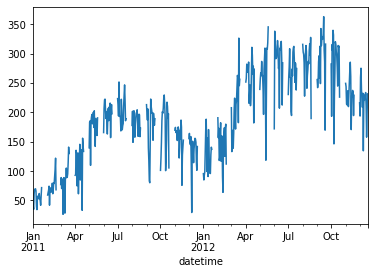

In [24]:
day_avg = df['count'].resample('D').mean()
day_avg.plot()

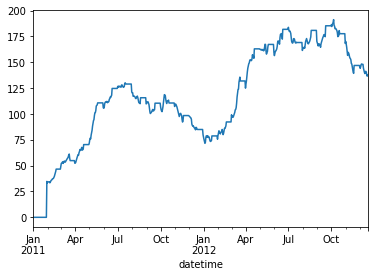

In [25]:
day_avg = df['count'].resample('D').mean().fillna(0)
day_avg.rolling(window=30).mean().fillna(0).plot() # 월별로 평균치의 추세를 살펴본다

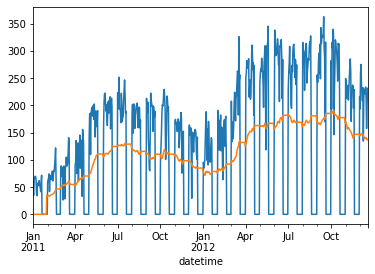

In [26]:
day_avg = df['count'].resample('D').mean().fillna(0)
day_avg.plot()
day_avg.rolling(window=30).mean().fillna(0).plot() # 함께 살펴보기

## Cumsum
- 시계열 데이터를 window마다 합친다
- rolling(window=10).sum()과 다름!
  - 앞 열흘간의 합 / cumsum의 경우, 축적해서 쌓아감

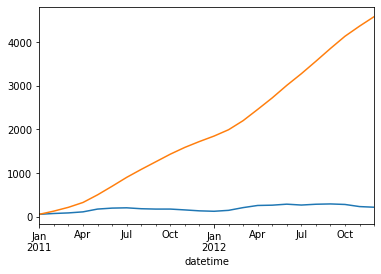

In [28]:
monthly_avg = df['count'].resample('M').mean()
cumsum_avg = df['count'].resample('M').mean().cumsum()
monthly_avg.plot()
cumsum_avg.plot() # 그래프 간격의 차이가 심해서 한 눈에 보기 어려움!

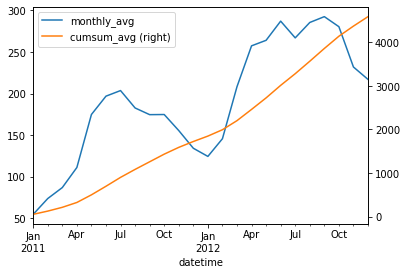

In [30]:
monthly_avg = df['count'].resample('M').mean()
cumsum_avg = df['count'].resample('M').mean().cumsum()
monthly_avg = monthly_avg.rename('monthly_avg')
cumsum_avg = cumsum_avg.rename('cumsum_avg')
df_monthly = pd.concat([monthly_avg, cumsum_avg], axis = 1)

ax = df_monthly.plot(y='monthly_avg', use_index=True)
df_monthly.plot(y='cumsum_avg', secondary_y = True, ax=ax, use_index=True) # 동일한 ax상에서 각 y축을 달리하며 그래프를 그린다